# 06 — Exponential Smoothing: SES, Holt, and Holt–Winters (ETS)


In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [2]:
# Synthetic seasonal series
idx = pd.date_range("2016-01-01", periods=120, freq="MS")
rng = np.random.default_rng(77)
level = 100 + np.linspace(0, 20, len(idx))
seasonal = 10*np.sin(2*np.pi*idx.month/12)
noise = rng.normal(0, 2, len(idx))
ts = pd.Series(level + seasonal + noise, index=idx)

In [3]:
train, test = ts[:-12], ts[-12:]

In [4]:
# SES (no trend/seasonality)
ses = SimpleExpSmoothing(train).fit()
ses_fc = ses.forecast(len(test))

In [5]:
# Holt (trend)
holt = ExponentialSmoothing(train, trend="add", seasonal=None).fit()
holt_fc = holt.forecast(len(test))

In [6]:
# Holt-Winters (trend + seasonality)
hw = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).fit()
hw_fc = hw.forecast(len(test))

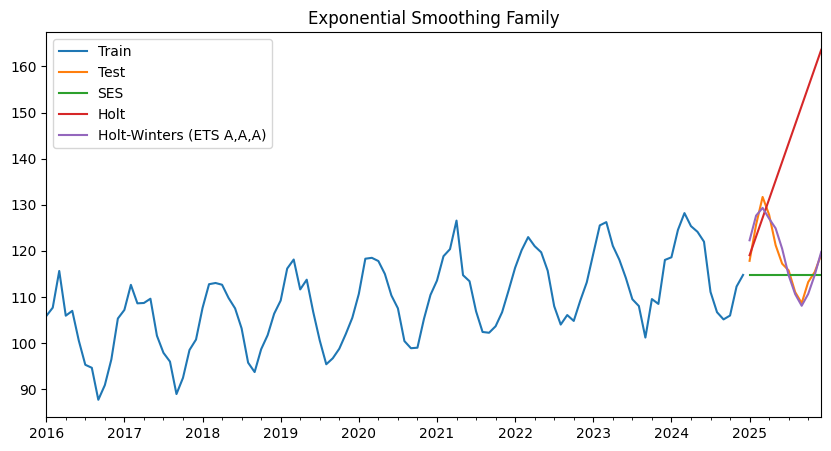

In [7]:
plt.figure(figsize=(10,5))
train.plot(label="Train"); test.plot(label="Test")
ses_fc.plot(label="SES"); holt_fc.plot(label="Holt")
hw_fc.plot(label="Holt-Winters (ETS A,A,A)")
plt.title("Exponential Smoothing Family")
plt.legend(); plt.show()
